In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Read in and standardize the data

In [2]:
df_activities_happiness = pd.read_csv('daily_activities_and_happiness.csv')

In [3]:
df_activities_happiness.head()

,daily_minutes_hobby,daily_minutes_exercise,daily_minutes_grooming,daily_minutes_commuting,daily_minutes_tv,daily_minutes_talking_to_friend,happiness_rating
0,19,16,14,20,95,22,2
1,17,23,8,64,72,14,1
2,20,21,18,53,30,18,2
3,23,21,20,65,22,15,2
4,28,7,19,38,36,14,2


In [4]:
from sklearn.preprocessing import normalize, scale

In [5]:
data = np.array(df_activities_happiness)

In [6]:
data_standardized = scale(data, axis=0)

In [7]:
data_standardized

array([[-0.29102906, -0.67627368, -0.46331435, ...,  0.7019932 ,
         1.12765327,  0.52036641],
       [-0.58237654,  0.46872577, -1.45613082, ..., -0.17727396,
        -0.1915767 , -1.04586802],
       [-0.14535533,  0.14158307,  0.19856329, ..., -1.78289226,
         0.46803829,  0.52036641],
       ...,
       [ 1.16570832, -0.18555963, -0.13237553, ...,  0.62553518,
         1.29255702,  0.52036641],
       [ 0.29166589, -0.18555963, -0.79425317, ...,  0.58730618,
         1.45746077,  0.52036641],
       [-1.45641897, -0.34913098, -0.13237553, ..., -1.93580829,
        -0.1915767 ,  0.52036641]])

In [8]:
data_standardized[:, 0][:10]

array([-2.91029064e-01, -5.82376540e-01, -1.45355326e-01,  2.91665889e-01,
        1.02003458e+00, -2.91029064e-01, -2.91029064e-01, -1.45355326e-01,
        3.18412542e-04,  1.45992151e-01])

In [9]:
np.mean(data_standardized[:, 0])

1.7084087635761973e-16

In [10]:
df = pd.DataFrame(data_standardized, columns=df_activities_happiness.columns)

In [11]:
df.head()

,daily_minutes_hobby,daily_minutes_exercise,daily_minutes_grooming,daily_minutes_commuting,daily_minutes_tv,daily_minutes_talking_to_friend,happiness_rating
0,-0.291029,-0.676274,-0.463314,-1.849802,0.701993,1.127653,0.520366
1,-0.582377,0.468726,-1.456131,0.487707,-0.177274,-0.191577,-1.045868
2,-0.145355,0.141583,0.198563,-0.096670,-1.782892,0.468038,0.520366
3,0.291666,0.141583,0.529502,0.540832,-2.088724,-0.026673,0.520366
4,1.020035,-2.148416,0.364033,-0.893548,-1.553518,-0.191577,0.520366


In [12]:
df_activities_happiness.head()

,daily_minutes_hobby,daily_minutes_exercise,daily_minutes_grooming,daily_minutes_commuting,daily_minutes_tv,daily_minutes_talking_to_friend,happiness_rating
0,19,16,14,20,95,22,2
1,17,23,8,64,72,14,1
2,20,21,18,53,30,18,2
3,23,21,20,65,22,15,2
4,28,7,19,38,36,14,2


In [13]:
df_activities_happiness.daily_minutes_hobby.describe()

count    915.000000
mean      20.997814
std        6.868410
min        0.000000
25%       16.000000
50%       21.000000
75%       25.000000
max       42.000000
Name: daily_minutes_hobby, dtype: float64

# Precompute distance and run clustering

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [15]:
df.head()

,daily_minutes_hobby,daily_minutes_exercise,daily_minutes_grooming,daily_minutes_commuting,daily_minutes_tv,daily_minutes_talking_to_friend,happiness_rating
0,-0.291029,-0.676274,-0.463314,-1.849802,0.701993,1.127653,0.520366
1,-0.582377,0.468726,-1.456131,0.487707,-0.177274,-0.191577,-1.045868
2,-0.145355,0.141583,0.198563,-0.096670,-1.782892,0.468038,0.520366
3,0.291666,0.141583,0.529502,0.540832,-2.088724,-0.026673,0.520366
4,1.020035,-2.148416,0.364033,-0.893548,-1.553518,-0.191577,0.520366


In [16]:
pdist(df)

array([3.5794003 , 3.28807085, 4.1024152 , ..., 1.49984406, 4.79647859,
       3.93650741])

In [17]:
max(pdist(df))

8.144139839456704

In [18]:
Z = linkage(df, method='ward')

In [19]:
Z.shape

(914, 4)

In [20]:
# Z provides a history of how clusters would be formed hierarchically
Z[1]

array([181.        , 224.        ,   0.24580317,   2.        ])

In [21]:
Z[2]

array([ 73.        , 119.        ,   0.25797666,   2.        ])

In [22]:
Z[-1]

array([1823.        , 1827.        ,   41.15745277,  915.        ])

# Visualize results

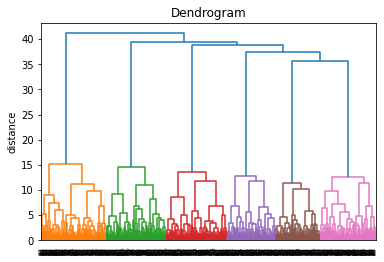

In [23]:
# But we need a systematic way to visualize this
# calculate dendrogram
plt.title('Dendrogram')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90,
    leaf_font_size=4,
)
plt.show()

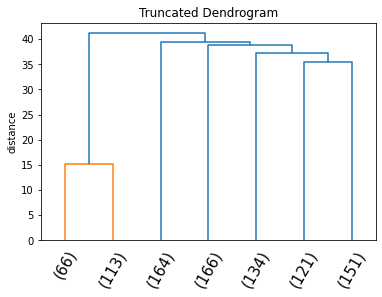

In [24]:
plt.title('Truncated Dendrogram')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',
    p=7,
    show_leaf_counts=True,
    leaf_rotation=60,
    leaf_font_size=15,
    show_contracted=False,
)
plt.show()

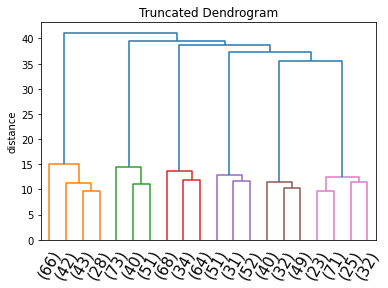

In [25]:
plt.title('Truncated Dendrogram')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    show_leaf_counts=True,
    leaf_rotation=60,
    leaf_font_size=15,
    show_contracted=False,
)
plt.show()

In [26]:
# set number of clusters by max distance of jump & get cluster labels
from scipy.cluster.hierarchy import fcluster
max_d = 16
clusters = fcluster(Z, max_d, criterion='distance')
set(clusters)

{1, 2, 3, 4, 5, 6}

In [27]:
np.histogram(clusters, bins=7)

(array([179, 164, 166,   0, 134, 121, 151]),
 array([1.        , 1.71428571, 2.42857143, 3.14285714, 3.85714286,
        4.57142857, 5.28571429, 6.        ]))

In [28]:
num_k = 6
clusters = fcluster(Z, num_k, criterion='maxclust')
set(clusters)

{1, 2, 3, 4, 5, 6}

In [29]:
np.histogram(clusters)

(array([179,   0, 164,   0, 166,   0, 134,   0, 121, 151]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]))

In [30]:
df_activities_happiness['cluster_assignment'] = clusters

In [31]:
interesting_clusters = df_activities_happiness.groupby(
    'cluster_assignment').daily_minutes_hobby.count()

In [32]:
use_clusters = set(interesting_clusters[interesting_clusters > 30].index)

In [33]:
use_clusters

{1, 2, 3, 4, 5, 6}

In [34]:
d = df_activities_happiness[df_activities_happiness.cluster_assignment.apply(
    lambda x: x in use_clusters)].groupby('cluster_assignment').mean()
d

,daily_minutes_hobby,daily_minutes_exercise,daily_minutes_grooming,daily_minutes_commuting,daily_minutes_tv,daily_minutes_talking_to_friend,happiness_rating
cluster_assignment,,,,,,,
1,21.340782,20.921788,24.770950,62.854749,84.094972,17.240223,0.843575
2,21.268293,19.298780,17.274390,22.554878,90.951220,19.042683,1.957317
3,21.192771,20.716867,17.765060,56.319277,27.783133,15.006024,2.012048
4,20.485075,19.761194,17.783582,56.298507,91.186567,3.194030,2.000000
5,20.570248,19.702479,5.710744,53.090909,73.586777,13.611570,0.975207
6,20.880795,20.145695,13.788079,78.761589,95.490066,20.516556,2.211921


In [35]:
pd.DataFrame(scale(d), columns=d.columns)

,daily_minutes_hobby,daily_minutes_exercise,daily_minutes_grooming,daily_minutes_commuting,daily_minutes_tv,daily_minutes_talking_to_friend,happiness_rating
0,1.143790,1.448824,1.504987,0.469760,0.298318,0.436054,-1.516408
1,0.928127,-1.382021,0.191392,-1.934282,0.594193,0.754040,0.535447
2,0.703443,1.091402,0.277370,0.079894,-2.131768,0.041901,0.636278
3,-1.402021,-0.575480,0.280616,0.078655,0.604349,-2.041948,0.614082
4,-1.148622,-0.677890,-1.834863,-0.112691,-0.155154,-0.204106,-1.273903
5,-0.224716,0.095166,-0.419501,1.418664,0.790062,1.014058,1.004504


# KMeans clustering instead of hierarchical clustering

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(df)

In [37]:
df_activities_happiness['kmeans_cluster_assignments'] = kmeans.labels_

In [38]:
df_activities_happiness.groupby(
    'kmeans_cluster_assignments').daily_minutes_hobby.count()

kmeans_cluster_assignments
0    162
1    180
2    166
3    121
4    152
5    134
Name: daily_minutes_hobby, dtype: int64

In [39]:
df_activities_happiness.groupby(
    'cluster_assignment').daily_minutes_hobby.count()

cluster_assignment
1    179
2    164
3    166
4    134
5    121
6    151
Name: daily_minutes_hobby, dtype: int64

In [40]:
df_activities_happiness.groupby(
    'kmeans_cluster_assignments').daily_minutes_hobby.var().mean()

47.03585735622366

In [41]:
df_activities_happiness.groupby(
    'cluster_assignment').daily_minutes_hobby.var().mean()

47.03335118974865

In [42]:
d2 = df_activities_happiness[df_activities_happiness.kmeans_cluster_assignments.apply(
    lambda x: x in use_clusters)].groupby('cluster_assignment').mean()
d2

,daily_minutes_hobby,daily_minutes_exercise,daily_minutes_grooming,daily_minutes_commuting,daily_minutes_tv,daily_minutes_talking_to_friend,happiness_rating,kmeans_cluster_assignments
cluster_assignment,,,,,,,,
1,21.337079,20.994382,24.808989,63.022472,84.151685,17.219101,0.842697,1
2,23.000000,29.666667,20.666667,39.000000,87.000000,19.333333,1.333333,2
3,21.192771,20.716867,17.765060,56.319277,27.783133,15.006024,2.012048,2
4,20.485075,19.761194,17.783582,56.298507,91.186567,3.194030,2.000000,5
5,20.570248,19.702479,5.710744,53.090909,73.586777,13.611570,0.975207,3
6,20.880795,20.145695,13.788079,78.761589,95.490066,20.516556,2.211921,4
